In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.preprocessing import StandardScaler,LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("./CarPricesData.csv")
data.head(10)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0
5,12950,32.0,61000,Diesel,90,0,0,2000.0,3,1170.0
6,16900,27.0,94612,Diesel,90,1,0,2000.0,3,1245.0
7,18600,30.0,75889,Diesel,90,1,0,2000.0,3,1245.0
8,21500,27.0,19700,Petrol,192,0,0,1800.0,3,1185.0
9,12950,23.0,71138,Diesel,69,0,0,1900.0,3,1105.0


In [3]:
data.tail(10)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
1426,9950,78.0,30964,Petrol,110,0,1,1600.0,3,1080.0
1427,8950,71.0,29000,Petrol,86,1,1,1300.0,3,1045.0
1428,8450,72.0,26000,Petrol,86,0,0,1300.0,3,1015.0
1429,8950,78.0,24000,Petrol,86,1,1,1300.0,5,1065.0
1430,8450,80.0,23000,Petrol,86,0,0,1300.0,3,1015.0
1431,7500,69.0,20544,Petrol,86,1,0,1300.0,3,1025.0
1432,10845,72.0,19000,Petrol,86,0,0,1300.0,3,1015.0
1433,8500,71.0,17016,Petrol,86,0,0,1300.0,3,1015.0
1434,7250,70.0,16916,Petrol,86,1,0,1300.0,3,1015.0
1435,6950,76.0,1,Petrol,110,0,0,1600.0,5,1114.0


In [4]:
data.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1434.000000,1436.000000,1436.000000,1436.000000,1436.000000,1434.000000,1436.000000,1434.000000
mean,10730.824513,55.986750,68533.259749,101.502089,0.674791,0.055710,1566.990934,4.033426,1072.487448
std,3626.964585,18.581796,37506.448872,14.981080,0.468616,0.229441,187.178221,0.952677,52.672475
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.000000
50%,9900.000000,61.000000,63389.500000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.000000
75%,11950.000000,70.000000,87020.750000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1434 non-null   float64
 2   KM         1436 non-null   int64  
 3   FuelType   1432 non-null   object 
 4   HP         1436 non-null   int64  
 5   MetColor   1436 non-null   int64  
 6   Automatic  1436 non-null   int64  
 7   CC         1434 non-null   float64
 8   Doors      1436 non-null   int64  
 9   Weight     1434 non-null   float64
dtypes: float64(3), int64(6), object(1)
memory usage: 112.3+ KB


In [6]:
data.isnull().mean()*100

Price        0.000000
Age          0.139276
KM           0.000000
FuelType     0.278552
HP           0.000000
MetColor     0.000000
Automatic    0.000000
CC           0.139276
Doors        0.000000
Weight       0.139276
dtype: float64

In [7]:
data.dropna(inplace=True)

In [8]:
data.duplicated().sum()

1

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
le = LabelEncoder()

In [11]:
for i in data.columns:
    if data[i].dtype == 'object':
        data[i] = le.fit_transform(data[i])
        

In [12]:
data.sample(10)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
1096,7900,75.0,125400,2,110,0,0,1600.0,3,1050.0
596,10450,50.0,17619,2,110,0,0,1600.0,4,1030.0
426,11450,49.0,86221,2,110,0,0,1600.0,3,1045.0
388,7750,48.0,140700,1,69,1,0,1900.0,5,1110.0
947,8950,68.0,53000,2,110,1,1,1587.0,3,1075.0
376,11500,39.0,12000,2,110,1,0,1600.0,5,1075.0
904,9450,61.0,59000,2,110,1,0,1600.0,5,1070.0
942,10500,57.0,54000,2,110,1,0,1600.0,5,1075.0
1379,7750,74.0,56132,2,110,0,0,1600.0,4,1035.0
431,10950,50.0,82735,2,97,1,0,1400.0,3,1030.0


#### Selecting the features and targets

In [13]:
x = data.iloc[:,1:].values
y = data.iloc[:,0].values

#### Splitting the data into training and testing sets

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

#### Checking model scores without feature selection

In [15]:
model = LinearRegression()

In [16]:
model.fit(x_train,y_train)

LinearRegression()

In [17]:
y_pred = model.predict(x_test)

In [18]:
model.score(x_train,y_train)

0.861762477331229

In [19]:
model.score(x_test,y_test)

0.8708517690870113

#### Defining feature selection with all features included

In [20]:
fs = SelectKBest(score_func=f_regression,k='all')

#### Fitting the fs

In [21]:
fs.fit(x_train,y_train)

SelectKBest(k='all', score_func=<function f_regression at 0x000001CE7BB0E560>)

#### Checking the scores for the features

In [22]:
for i in range(len(fs.scores_)):
    print("Feature %d:%f"%(i,fs.scores_[i]))

Feature 0:3723.096607
Feature 1:589.688041
Feature 2:0.007963
Feature 3:137.680309
Feature 4:10.973220
Feature 5:0.873022
Feature 6:23.886260
Feature 7:40.573243
Feature 8:506.819328


#### Plotting the scores in a bar grapgh

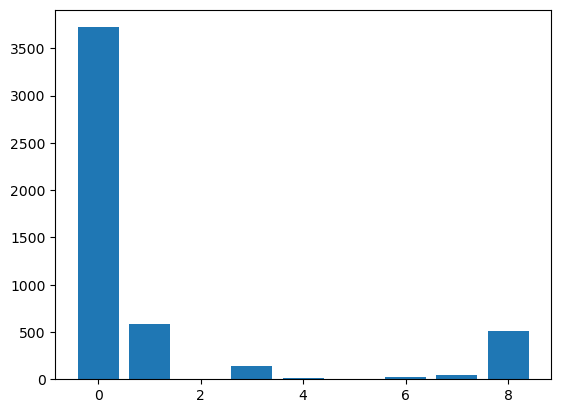

In [23]:
plt.bar([i for i in range(len(fs.scores_))],fs.scores_)
plt.show()

#### Selecting k = 4

In [24]:
fs = SelectKBest(score_func=f_regression,k=4)

#### Transorm the train and test data

In [25]:
fs.fit(x_train,y_train)

SelectKBest(k=4, score_func=<function f_regression at 0x000001CE7BB0E560>)

In [26]:
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

In [27]:
x_test_fs.shape

(285, 4)

In [28]:
model = LinearRegression()

In [29]:
model.fit(x_train_fs,y_train)

LinearRegression()

In [30]:
y_pred_fs = model.predict(x_test_fs)

In [31]:
model.score(x_train_fs,y_train)

0.8581005278601517

In [32]:
model.score(x_test_fs,y_test)

0.8660327850546731

#### Selecting only the top feature

In [33]:
fs = SelectKBest(score_func=f_regression,k=4)

#### Fitting the fs

In [34]:
fs.fit(x_train,y_train)

SelectKBest(k=4, score_func=<function f_regression at 0x000001CE7BB0E560>)

#### Transforming the training and testing data

In [35]:
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

In [36]:
model.fit(x_train_fs,y_train)

LinearRegression()

In [37]:
model.score(x_train_fs,y_train)

0.8581005278601517

In [38]:
model.score(x_test_fs,y_test)

0.8660327850546731

#### We can see that there is 86 % of accuracy just by using only one variable.

In [39]:
mean_absolute_error(y_test,y_pred)

985.1093909936941

In [40]:
mean_squared_error(y_test,y_pred)

1599261.1298079093

In [41]:
np.sqrt(mean_squared_error(y_test,y_pred))

1264.6189662534362

In [42]:
Output = pd.DataFrame(zip(y_test,y_pred),columns=['Actual','Prediction'])

In [43]:
Output.head()

,Actual,Prediction
0,9450,9017.537903
1,8950,9739.203795
2,8250,7438.916594
3,10450,12373.043636
4,9250,8833.324851


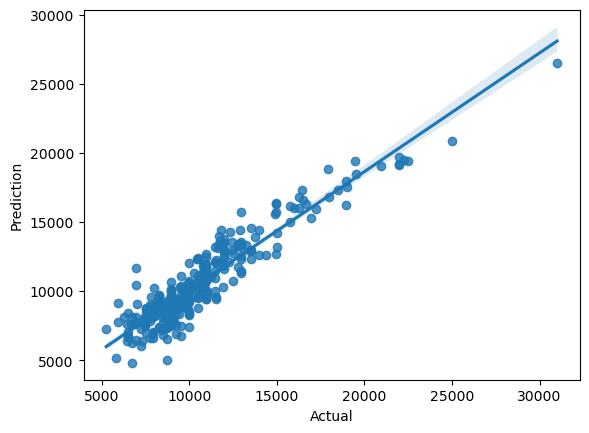

In [44]:
sns.regplot(data=Output,x='Actual',y='Prediction')
plt.show()